In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

interference_types = ['some-memcached', 'ibench-cpu', 'ibench-l1i', 'ibench-l1d', 'ibench-l2', 'ibench-llc', 'ibench-membw']
label_map = {key: key for key in interference_types if key != 'some-memcached'}
label_map['some-memcached'] = 'no-interference'


In [102]:
def aggregate_metrics(df):
    means = df.groupby('target').agg({'QPS': 'mean', 'p95': 'mean'}).sort_values('QPS')
    errs = df.groupby('target').agg({'QPS': 'std', 'p95': 'std'}).loc[means.index]
    return means, errs

def create_figure(df_list, xlim=(0,55000), ylim=(0,10), use_error_bars=True):
    fig = plt.figure(figsize=(10, 6))
    marker_styles = ['o', 's', 'D', '^', '<', '>', '*']
    for idx, interference_type in enumerate(interference_types):
        means, errs = aggregate_metrics(df_list[interference_type])
        marker = marker_styles[idx % len(marker_styles)]
        if use_error_bars:
            plt.errorbar(means['QPS'], means['p95']/1000, xerr=errs['QPS'], yerr=errs['p95']/1000, fmt=f'--{marker}', markersize=6, elinewidth=0.5, capsize=1, label=label_map[interference_type])   
        else:
            plt.plot(means['QPS'], means['p95']/1000, f'--{marker}', markersize=4, label=label_map[interference_type])
            
    plt.xlabel('QPS', fontsize=14)
    plt.ylabel('$95^{th}$ Percentile Latency (ms)', fontsize=14)
    plt.title('QPS vs Latency (3 Run Average)', fontsize=16)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.tight_layout()
    
    return fig

def create_figure2(df_list, xlim=(0,55000), ylim=(0,10), use_error_bars=True):
    fig = plt.figure(figsize=(8, 6))
    marker_styles = ['o', 's', 'D', '^', '<', '>', '*']
    line_styles = ['-', '--', '-.', ':']
    for idx, interference_type in enumerate(interference_types):
        means, errs = aggregate_metrics(df_list[interference_type])
        marker = marker_styles[idx % len(marker_styles)]
        line_style = line_styles[idx % len(line_styles)]
        if use_error_bars:
            plt.errorbar(means['QPS'], means['p95']/1000, xerr=errs['QPS'], yerr=errs['p95']/1000,
                         fmt=line_style+marker, markersize=5, linewidth=2, elinewidth=0.8, capsize=1.5,
                         alpha=0.8, label=label_map[interference_type])
        else:
            plt.plot(means['QPS'], means['p95']/1000, line_style+marker, markersize=5, linewidth=2,
                     alpha=0.8, label=label_map[interference_type])
    
    plt.xlabel('QPS', fontsize=15)
    plt.ylabel('$95^{th}$ Percentile Latency (ms)', fontsize=15)
    plt.title('QPS vs Latency (3 Run Average)', fontsize=16)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.tight_layout()
    
    return fig



In [103]:
result_dfs = {}
for interference_type in interference_types:
    file_path = f'results/{interference_type}.csv'
    result_dfs[interference_type] = pd.read_csv(file_path)

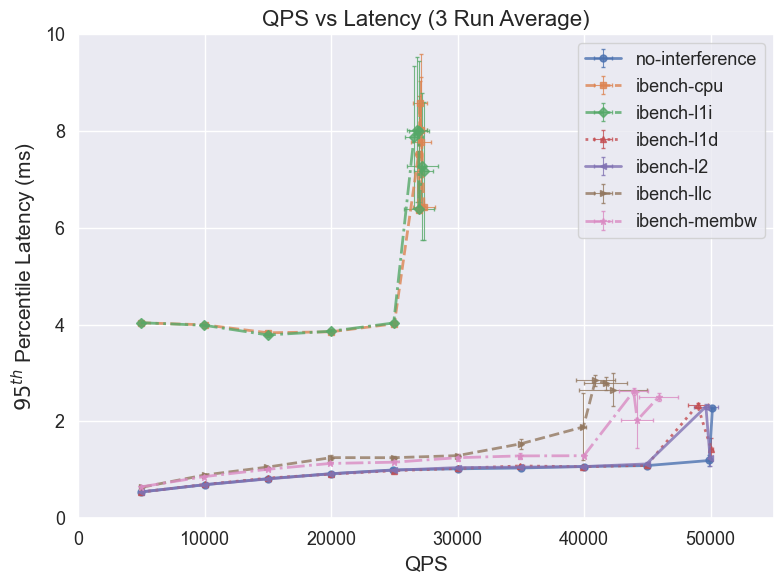

In [104]:
fig = create_figure2(result_dfs)
fig.savefig('figures/qps_vs_latency.png', dpi=300)